In [1]:
import pandas as pd
import numpy as np


In [2]:
#load datasets
df = pd.read_csv(r"diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Summary statistics of numerical columns
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:

df.shape

(53940, 10)

In [5]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
(df[['x','y','z']] == 0).sum()


x     8
y     7
z    20
dtype: int64

In [17]:
# Removing rows where x, y or z have zero values
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# Check again
(df[['x','y','z']] == 0).sum(), df.shape


(x    0
 y    0
 z    0
 dtype: int64,
 (49498, 10))

In [18]:
df.reset_index(drop=True, inplace=True)


In [19]:
#Counting the number of outliers in each numerical feature using the IQR (Interquartile Range) method.
numeric_cols = ['carat', 'price', 'x', 'y', 'z']

def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].shape[0]

for col in numeric_cols:
    print(col, "->", count_outliers(df, col))


carat -> 40
price -> 928
x -> 0
y -> 0
z -> 0


In [20]:

#  Removing Outliers using IQR Technique

cols = ['carat', 'price', 'x', 'y', 'z']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Keep only values inside acceptable boundary
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# New dataset shape after outlier removal
df.shape


(48532, 10)

In [21]:
#   Checking skewness of numerical features
from scipy.stats import skew

numeric_cols = ['carat','price','x','y','z']

for col in numeric_cols:
    print(col, "Skewness Before:", skew(df[col]))


carat Skewness Before: 0.6335826908806773
price Skewness Before: 1.0421926094063958
x Skewness Before: 0.21561707435031838
y Skewness Before: 0.2096799585088751
z Skewness Before: 0.21526917183640545


In [22]:
#   Applying Log Transformation to reduce skewness
import numpy as np

df['carat'] = np.log1p(df['carat'])
df['price'] = np.log1p(df['price'])
df['x'] = np.log1p(df['x'])
df['y'] = np.log1p(df['y'])
df['z'] = np.log1p(df['z'])


In [ ]:
!pip install scipy


In [23]:
#   Checking skewness after log transformation
from scipy.stats import skew

for col in ['carat','price','x','y','z']:
    print(col, "Skewness After:", skew(df[col]))


carat Skewness After: 0.3598741681453859
price Skewness After: 0.020440794024208446
x Skewness After: 0.04704260448335217
y Skewness After: 0.04387372831869998
z Skewness After: 0.05966929491595779


In [ ]:
!pip install matplotlib


In [ ]:
! pip install seaborn

In [24]:
#  Importing required visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


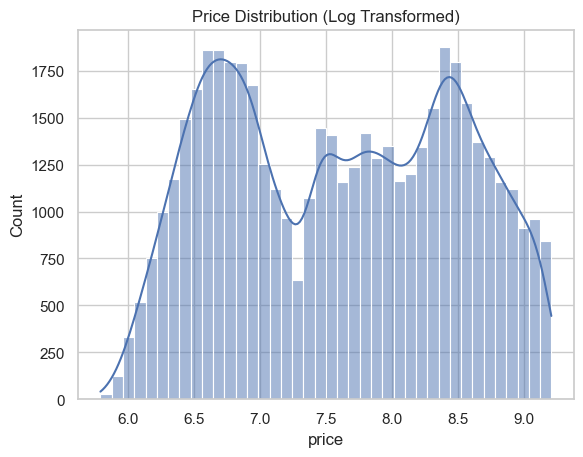

In [25]:
#  Visualizing price distribution after skewness correction
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution (Log Transformed)")
plt.show()


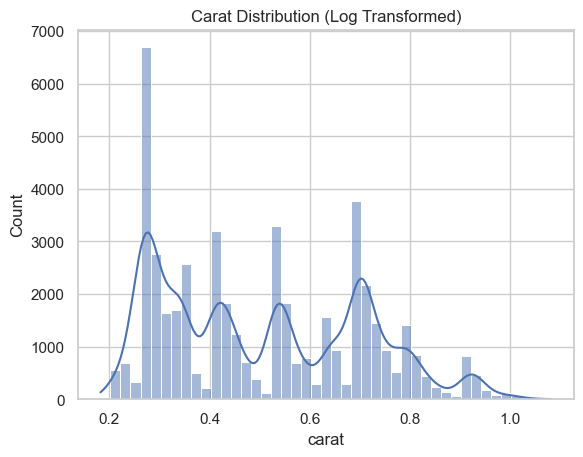

In [26]:
#  Carat distribution after transformation
sns.histplot(df['carat'], kde=True)
plt.title("Carat Distribution (Log Transformed)")
plt.show()


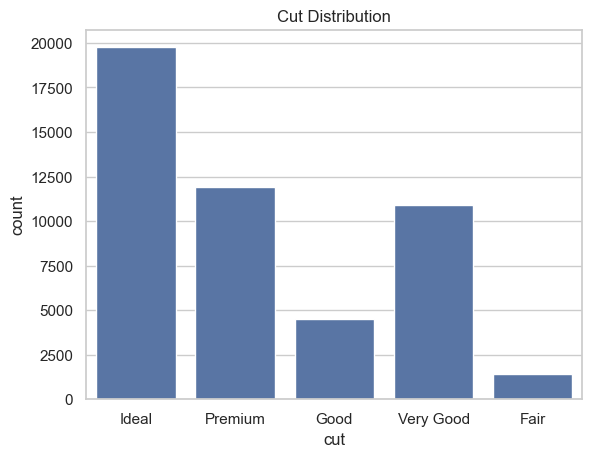

In [27]:
#  Count plot of diamond cut quality
sns.countplot(x='cut', data=df)
plt.title("Cut Distribution")
plt.show()


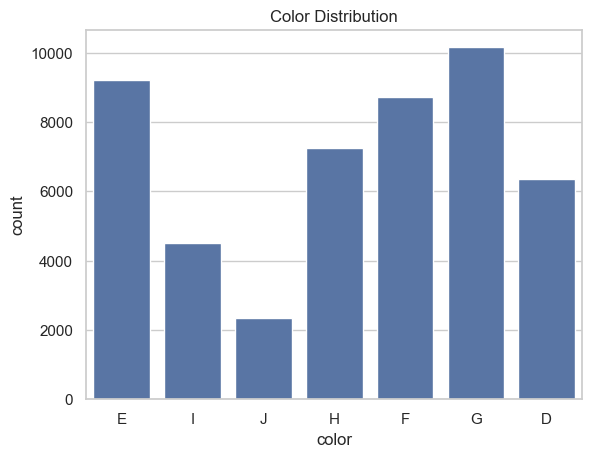

In [28]:
#  Count plot of diamond color grade
sns.countplot(x='color', data=df)
plt.title("Color Distribution")
plt.show()


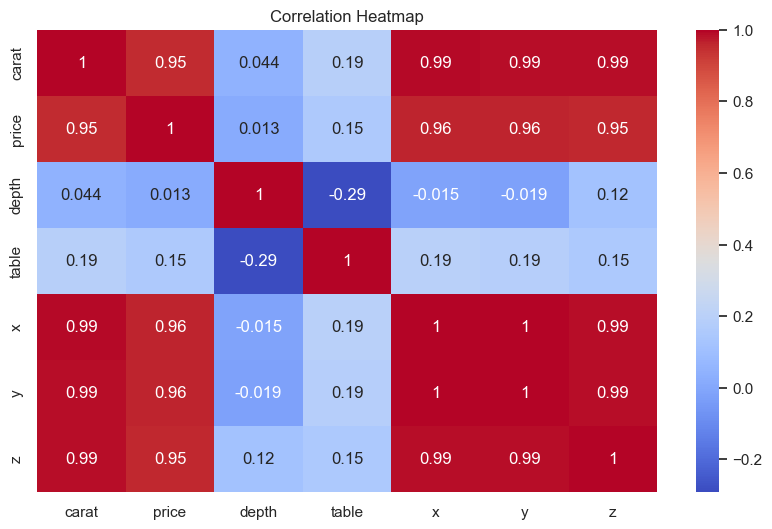

In [29]:
#  Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df[['carat','price','depth','table','x','y','z']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [30]:
#  CORRECT Feature Engineering 
# Reload original data for NON-LOG values
df_original = pd.read_csv(r"diamonds.csv")
df_original = df_original[(df_original['x'] > 0) & (df_original['y'] > 0) & (df_original['z'] > 0)]
df_original = df_original.iloc[df.index].reset_index(drop=True)
df_original['price'] = df_original['price'] * 83.5  # INR conversion

# CORRECT features using ORIGINAL values
df['volume'] = df_original['x'] * df_original['y'] * df_original['z']
df['price_per_carat'] = df_original['price'] / df_original['carat']  # INR/carat
df['dimension_ratio'] = (df_original['x'] + df_original['y']) / (2 * df_original['z'])

print(" Correct features created:")
print(df[['volume', 'price_per_carat', 'dimension_ratio']].head())



 Correct features created:
      volume  price_per_carat  dimension_ratio
0  38.202030    118352.173913         1.631687
1  34.505856    129623.809524         1.673160
2  38.076885    118715.217391         1.757576
3  46.724580     96168.965517         1.602662
4  51.917250     90233.870968         1.580000


In [38]:
#   Categorizing carat into weight groups

def carat_category(carat):
    if carat < np.log1p(0.50):    # log transformed value of 0.50
        return "Light"
    elif carat < np.log1p(1.50):  # log transformed value of 1.50
        return "Medium"
    else:
        return "Heavy"

df['carat_category'] = df['carat'].apply(carat_category)


In [39]:
#  Checking updated dataset structure
df.head()
df.shape
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume', 'price_per_carat', 'dimension_ratio', 'cut_ord',
       'color_ord', 'clarity_ord', 'carat_category'],
      dtype='object')

In [40]:
#  Ordinal Encoding for ordered categorical features
cut_order = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color_order = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
clarity_order = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

df['cut_ord'] = df['cut'].map(cut_order)
df['color_ord'] = df['color'].map(color_order)
df['clarity_ord'] = df['clarity'].map(clarity_order)

print(df[['cut','cut_ord','color','color_ord','clarity','clarity_ord']].head())



       cut  cut_ord color  color_ord clarity  clarity_ord
0    Ideal        5     E          6     SI2            2
1  Premium        4     E          6     SI1            3
2     Good        2     E          6     VS1            5
3  Premium        4     I          2     VS2            4
4     Good        2     J          1     SI2            2


In [41]:
#  One-Hot Encoding for carat_category


df = pd.get_dummies(df, columns=['carat_category'], prefix='carat', dtype=int)

df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dimension_ratio,cut_ord,color_ord,clarity_ord,carat_Heavy,carat_Light,carat_Medium
0,0.207014,Ideal,E,SI2,61.5,55.0,5.789960,1.599388,1.605430,1.232560,38.202030,118352.173913,1.631687,5,6,2,0,1,0
1,0.190620,Premium,E,SI1,59.8,61.0,5.789960,1.587192,1.576915,1.196948,34.505856,129623.809524,1.673160,4,6,3,0,1,0
2,0.207014,Good,E,VS1,56.9,65.0,5.793014,1.619388,1.623341,1.196948,38.076885,118715.217391,1.757576,2,6,5,0,1,0
3,0.254642,Premium,I,VS2,62.4,58.0,5.814131,1.648659,1.654411,1.289233,46.724580,96168.965517,1.602662,4,2,4,0,1,0
4,0.270027,Good,J,SI2,63.3,58.0,5.817111,1.675226,1.677097,1.321756,51.917250,90233.870968,1.580000,2,1,2,0,1,0


In [42]:
df.shape


(48532, 19)

In [ ]:
!pip install scikit-learn


In [43]:
#  Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((38825, 18), (9707, 18))

In [44]:
#  Feature Scaling 

from sklearn.preprocessing import StandardScaler

# Identify numeric columns safely from X_train
num_cols = X_train.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,volume,price_per_carat,dimension_ratio,cut_ord,color_ord,clarity_ord,carat_Heavy,carat_Light,carat_Medium
6551,1.205681,Ideal,J,SI2,0.524308,-0.179127,1.174483,1.142868,1.230902,0.593669,-0.200872,-0.409581,0.972018,-2.052034,-1.266657,-0.189581,-0.756679,0.814439
21198,0.962846,Very Good,D,VVS2,1.298893,0.717848,0.812043,0.881153,1.022073,1.313079,1.002478,0.072459,-0.813326,1.497093,1.165488,-0.189581,-0.756679,0.814439
13642,1.571243,Premium,I,SI1,-0.602362,0.717848,1.440907,1.491766,1.376612,0.648187,0.365946,-0.259009,0.079346,-1.460513,-0.658621,-0.189581,-0.756679,0.814439
36380,-0.272798,Premium,F,SI2,-0.954446,0.269361,-0.050568,-0.088034,-0.206914,-0.981057,-0.501546,-0.013252,0.079346,0.314051,-1.266657,-0.189581,-0.756679,0.814439
1698,0.125078,Ideal,G,VS1,-0.250278,-0.179127,0.266311,0.295257,0.242110,-0.220370,0.116135,0.143799,0.972018,-0.277470,0.557451,-0.189581,-0.756679,0.814439


In [45]:

# Encode categorical columns, train model, and evaluate

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# 2. Apply One-Hot Encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols)  # drop='first' to avoid dummy trap
    ],
    remainder='passthrough'  # keep numeric columns as is
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# 3. Train Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test_encoded)

# 5. Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 0.015417120212319002
RMSE: 0.12416569660062719
MAE: 0.09749456783299949
R² Score: 0.9801874434745222


In [46]:
#  Training multiple ML models and evaluating performance

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train_encoded, y_train)  # train
    y_pred = model.predict(X_test_encoded)  # predict
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Convert results to DataFrame for display
results_df = pd.DataFrame(results).T
print(results_df)


                        MSE      RMSE       MAE        R2
Linear Regression  0.015417  0.124166  0.097495  0.980187
Decision Tree      0.005306  0.072841  0.029381  0.993181
Random Forest      0.002165  0.046525  0.021353  0.997218


In [49]:
#Evaluate and compare multiple regression models using MAE, MSE, RMSE, and R² metrics.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_train_encoded, y_train, X_test_encoded, y_test)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE       MSE      RMSE        R2
Linear Regression  0.097495  0.015417  0.124166  0.980187
Decision Tree      0.029381  0.005306  0.072841  0.993181
Random Forest      0.021353  0.002165  0.046525  0.997218


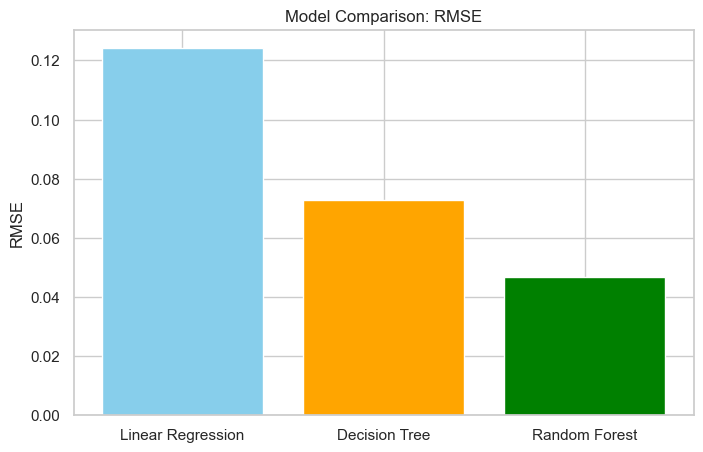

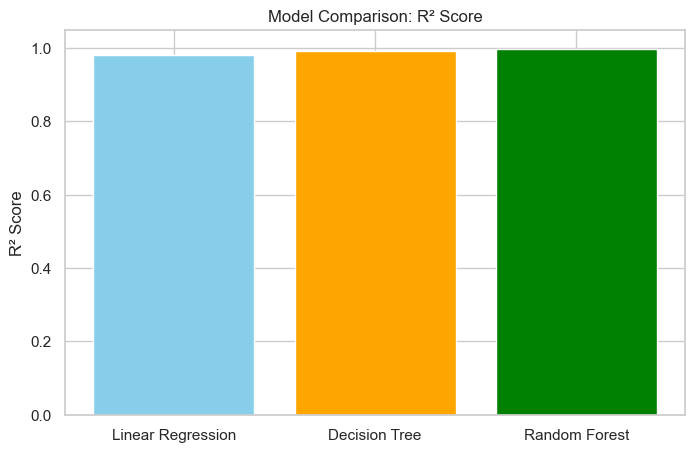

In [50]:
#Visual comparison of regression models based on RMSE and R² metrics.
import matplotlib.pyplot as plt

# Example: Compare RMSE of all models
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df['RMSE'], color=['skyblue', 'orange', 'green'])
plt.title("Model Comparison: RMSE")
plt.ylabel("RMSE")
plt.show()

# Example: Compare R² Score of all models
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df['R2'], color=['skyblue', 'orange', 'green'])
plt.title("Model Comparison: R² Score")
plt.ylabel("R² Score")
plt.ylim(0,1.05)
plt.show()


In [55]:
# Selecting only relevant features for clustering
cluster_df = df[['carat', 'volume', 'price_per_carat', 'dimension_ratio']]
cluster_df.head()


,carat,volume,price_per_carat,dimension_ratio
0,0.207014,38.202030,118352.173913,1.631687
1,0.190620,34.505856,129623.809524,1.673160
2,0.207014,38.076885,118715.217391,1.757576
3,0.254642,46.724580,96168.965517,1.602662
4,0.270027,51.917250,90233.870968,1.580000


In [56]:
#Standardizing cluster features to ensure equal contribution during clustering.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)


In [57]:
#Scaling ensures all features contribute equally during clustering.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)


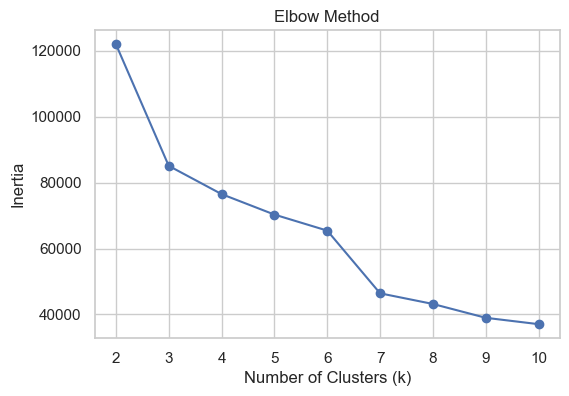

In [58]:
#Finding the Optimal Number of Clusters using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


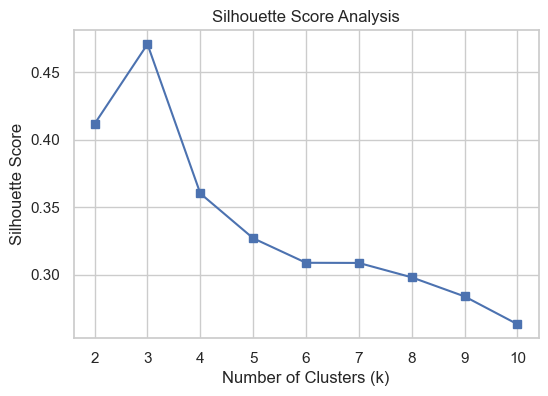

In [59]:
#The peak score indicates the most suitable number of clusters (optimal k).
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(cluster_scaled)
    sil_scores.append(silhouette_score(cluster_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, marker='s')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [61]:
optimal_k = 4  # Change if your plot indicates another value

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)

df['segment'] = cluster_labels
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dimension_ratio,cut_ord,color_ord,clarity_ord,carat_Heavy,carat_Light,carat_Medium,segment
0,0.207014,Ideal,E,SI2,61.5,55.0,5.789960,1.599388,1.605430,1.232560,38.202030,118352.173913,1.631687,5,6,2,0,1,0,1
1,0.190620,Premium,E,SI1,59.8,61.0,5.789960,1.587192,1.576915,1.196948,34.505856,129623.809524,1.673160,4,6,3,0,1,0,1
2,0.207014,Good,E,VS1,56.9,65.0,5.793014,1.619388,1.623341,1.196948,38.076885,118715.217391,1.757576,2,6,5,0,1,0,1
3,0.254642,Premium,I,VS2,62.4,58.0,5.814131,1.648659,1.654411,1.289233,46.724580,96168.965517,1.602662,4,2,4,0,1,0,1
4,0.270027,Good,J,SI2,63.3,58.0,5.817111,1.675226,1.677097,1.321756,51.917250,90233.870968,1.580000,2,1,2,0,1,0,1


In [62]:
df['segment'].value_counts()


segment
1    18678
0    13771
2    10029
3     6054
Name: count, dtype: int64

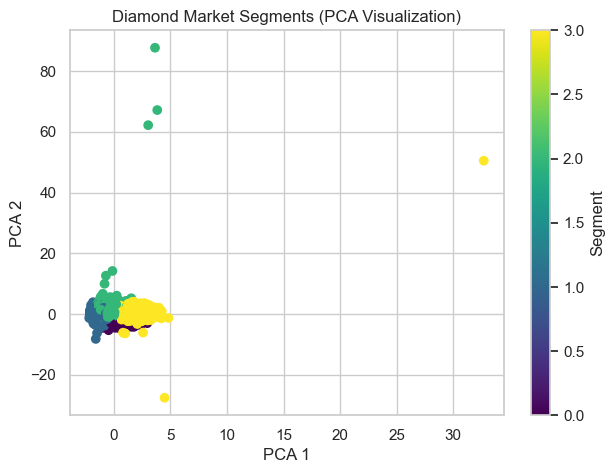

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['segment'], cmap='viridis')
plt.title("Diamond Market Segments (PCA Visualization)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Segment")
plt.show()


In [ ]:
!pip install torch


In [64]:
import torch

# Select only numeric columns for ANN (drop object columns)
X_train_ann = X_train.select_dtypes(include=['float64','int64']).copy()
X_test_ann  = X_test.select_dtypes(include=['float64','int64']).copy()

# Convert to PyTorch tensors
X_train_t = torch.tensor(X_train_ann.values, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_ann.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
y_test_t  = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

print("Tensors ready for ANN!")


Tensors ready for ANN!


In [65]:
#Training an Artificial Neural Network (ANN) for diamond price prediction using PyTorch.
import torch.nn as nn
import torch.optim as optim

class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

input_dim = X_train_t.shape[1]
model = ANNModel(input_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")


Epoch [20/100], Loss: 55.192165
Epoch [40/100], Loss: 45.000000
Epoch [60/100], Loss: 27.838915
Epoch [80/100], Loss: 10.033007
Epoch [100/100], Loss: 4.263923


In [69]:
#Evaluating the trained ANN model on the test set using MAE, MSE, RMSE, and R² metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model.eval()
with torch.no_grad():
    y_pred_ann = model(X_test_t).numpy()

mse_ann  = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann  = mean_absolute_error(y_test, y_pred_ann)
r2_ann   = r2_score(y_test, y_pred_ann)

print("ANN Performance:")
print("MAE:", mae_ann)
print("MSE:", mse_ann)
print("RMSE:", rmse_ann)
print("R² Score:", r2_ann)


ANN Performance:
MAE: 1.5712759255150266
MSE: 3.824904024680966
RMSE: 1.9557361848370465
R² Score: -3.9153879680438797


In [70]:
#Training and evaluating a K-Nearest Neighbors (KNN) regressor on the diamond dataset using standard regression metrics.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#  Select only numeric columns (scaled + encoded)
X_train_knn = X_train.select_dtypes(include=['float64','int64']).copy()
X_test_knn  = X_test.select_dtypes(include=['float64','int64']).copy()

#  Initialize and train KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_knn, y_train)

#  Predict on test set
y_pred_knn = knn_model.predict(X_test_knn)

#  Evaluate
mae_knn  = mean_absolute_error(y_test, y_pred_knn)
mse_knn  = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn   = r2_score(y_test, y_pred_knn)

#  Print results
print("KNN Performance:")
print("MAE:", mae_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("R² Score:", r2_knn)


KNN Performance:
MAE: 0.07413663456303193
MSE: 0.011157006031300296
RMSE: 0.10562672971980291
R² Score: 0.9856621204475265


In [72]:
# Selecting only relevant features for clustering
cluster_df = df[['carat', 'volume', 'price_per_carat', 'dimension_ratio']]
cluster_df.head()


,carat,volume,price_per_carat,dimension_ratio
0,0.207014,38.202030,118352.173913,1.631687
1,0.190620,34.505856,129623.809524,1.673160
2,0.207014,38.076885,118715.217391,1.757576
3,0.254642,46.724580,96168.965517,1.602662
4,0.270027,51.917250,90233.870968,1.580000


In [73]:
import pandas as pd

# Combine results  (Linear, Decision Tree, Random Forest)
# Add ANN and KNN results
final_results_df = pd.DataFrame({
    "Linear Regression": results_df.loc["Linear Regression"],
    "Decision Tree": results_df.loc["Decision Tree"],
    "Random Forest": results_df.loc["Random Forest"],
    "ANN": {"MAE": mae_ann, "MSE": mse_ann, "RMSE": rmse_ann, "R2": r2_ann},
    "KNN": {"MAE": mae_knn, "MSE": mse_knn, "RMSE": rmse_knn, "R2": r2_knn}
}).T

print("\nFinal Results Table:")
print(final_results_df)



Final Results Table:
                        MAE       MSE      RMSE        R2
Linear Regression  0.097495  0.015417  0.124166  0.980187
Decision Tree      0.029381  0.005306  0.072841  0.993181
Random Forest      0.021353  0.002165  0.046525  0.997218
ANN                1.571276  3.824904  1.955736 -3.915388
KNN                0.074137  0.011157  0.105627  0.985662


In [74]:
#Selecting the best-performing model based on R² and saving it as a .pkl file for future use.
import pickle

# Choose best model based on R²
best_model_name = final_results_df['R2'].idxmax()
print("Best Model:", best_model_name)

# Mapping model names to actual model objects
model_mapping = {
    "Linear Regression": models["Linear Regression"],
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "ANN": model,
    "KNN": knn_model
}

best_model = model_mapping[best_model_name]

# Save best model to .pkl
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Best model '{best_model_name}' saved as 'best_model.pkl'")


Best Model: Random Forest
Best model 'Random Forest' saved as 'best_model.pkl'


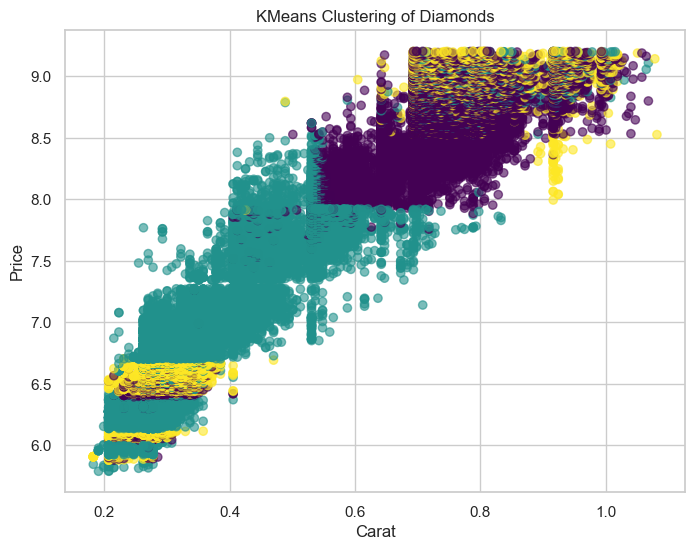

In [77]:
# KMeans clustering of diamonds based on carat, volume, and price, visualized in a scatter plot.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = df[['carat','volume','price']]

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_features)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['carat'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("KMeans Clustering of Diamonds")
plt.show()


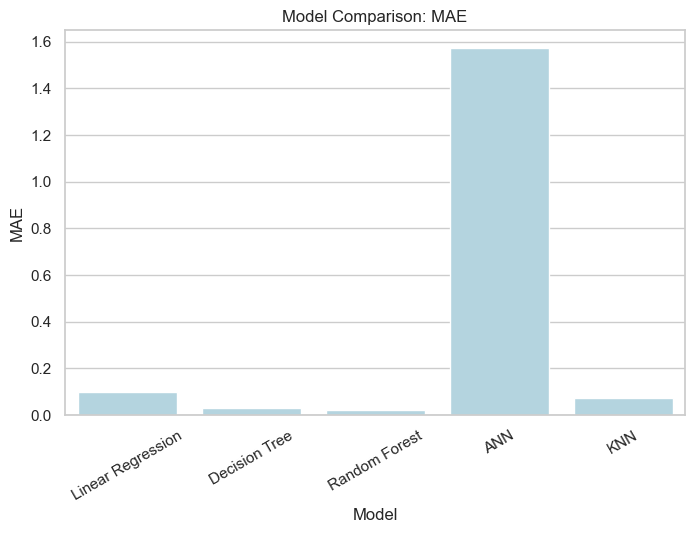

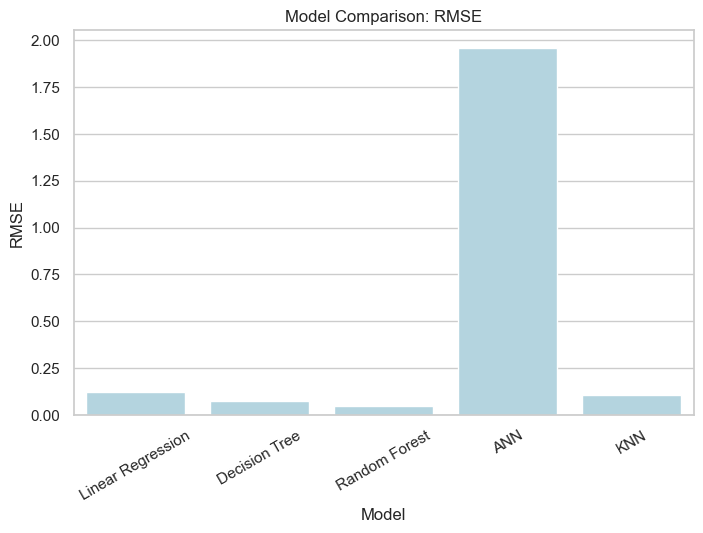

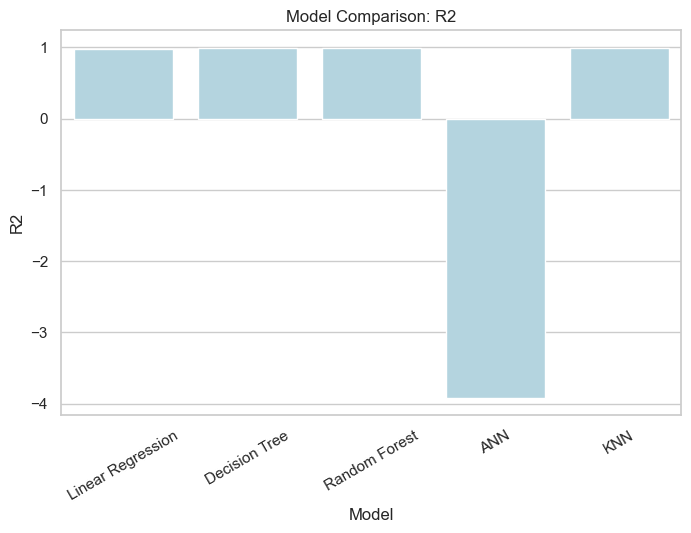

In [78]:
# Bar plots comparing regression models across MAE, RMSE, and R² metrics.
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'R2']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=final_results_df.index, 
        y=final_results_df[metric], 
        color="lightblue"   # palette ki jagah simple color use karo
    )
    plt.title(f"Model Comparison: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=30)
    plt.show()
